Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [4]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Checking for Duplicates

In [5]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Unique Values in Categorical Columns

In [6]:

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes' nan]
MultipleLines: ['No phone service' 'No' 'Yes' nan]
InternetService: ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity: ['No' 'Yes' 'No internet service' nan]
OnlineBackup: ['Yes' 'No' 'No internet service' nan]
DeviceProtection: ['No' 'Yes' 'No internet service' nan]
TechSupport: ['No' 'Yes' 'No internet service' nan]
StreamingTV: ['No' 'Yes' 'No internet service' nan]
StreamingMovies: ['No' 'Yes' 'No internet service' nan]
Contract: ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling: ['Yes' 'No' nan]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


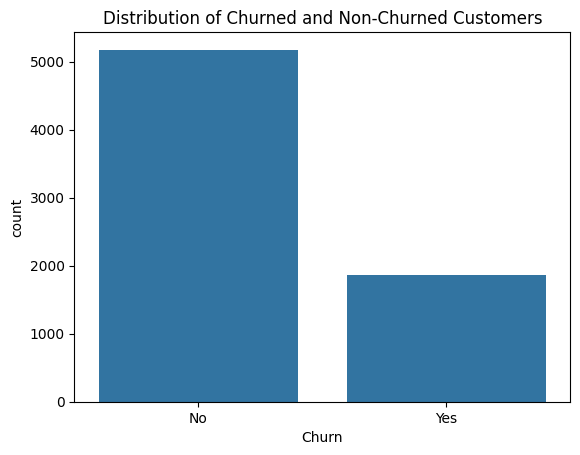

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [7]:
# Count of churned vs. non-churned customers
sns.countplot(data=df, x='Churn')
plt.title("Distribution of Churned and Non-Churned Customers")
plt.show()

# Percentage distribution
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


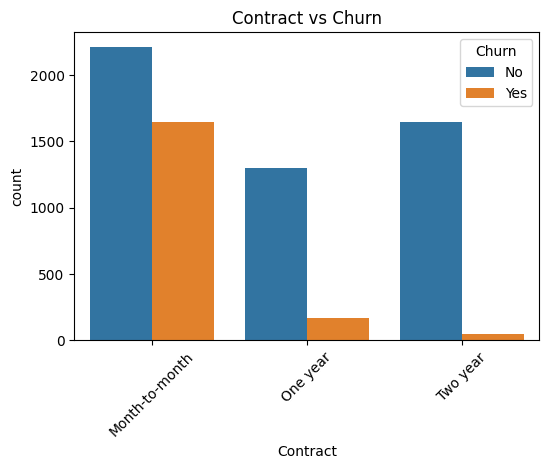

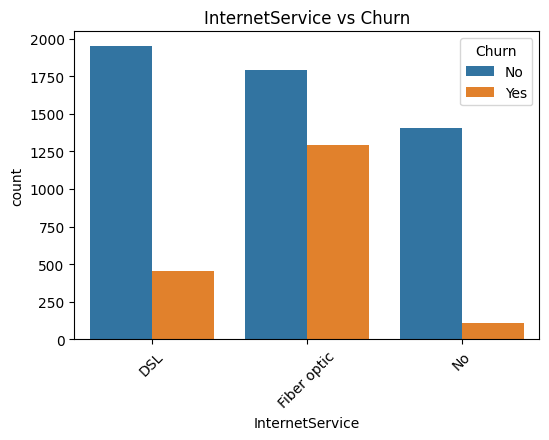

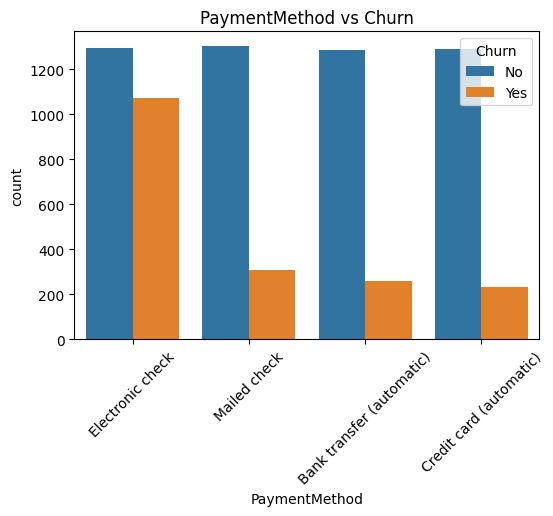

In [8]:
# Plot categorical features against churn
features = ['Contract', 'InternetService', 'PaymentMethod']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f"{feature} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


In [9]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Handling Missing Values

In [10]:
# Check missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges        18
Churn                0
dtype: int64


In [11]:
# Fill missing numerical values with median
df['SeniorCitizen'].fillna(df['SeniorCitizen'].median(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill missing categorical values with mode
categorical_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



<ipython-input-11-95ec91af4060>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SeniorCitizen'].fillna(df['SeniorCitizen'].median(), inplace=True)
<ipython-input-11-95ec91af4060>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [12]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


 Drop Irrelevant Columns

In [13]:
df.drop('customerID', axis=1, inplace=True)

Encoding

In [14]:
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
# Binary columns (Yes/No or two unique values)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Multi-category columns (Nominal)
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Other categorical columns for label encoding
label_encode_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# -------------------- Apply Label Encoding -------------------- #
le = LabelEncoder()

# Encode binary columns
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Encode other multi-category columns
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# -------------------- Apply Binary Encoding -------------------- #
binary_encoder = ce.BinaryEncoder(cols=multi_category_cols)
df = binary_encoder.fit_transform(df)


# -------------------- Display Processed Data -------------------- #
print(df.head())
print(df.info())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0            0.0        1           0     1.0             0   
1       1            0.0        0           0    34.0             1   
2       1            0.0        0           0     2.0             1   
3       1            0.0        0           0    45.0             0   
4       0            0.0        0           0     2.0             1   

   MultipleLines  InternetService_0  InternetService_1  OnlineSecurity  ...  \
0              1                  0                  1               0  ...   
1              0                  0                  1               2  ...   
2              0                  0                  1               2  ...   
3              1                  0                  1               2  ...   
4              0                  1                  0               0  ...   

   StreamingMovies  Contract_0  Contract_1  PaperlessBilling  PaymentMethod_0  \
0                

Checking Outliers

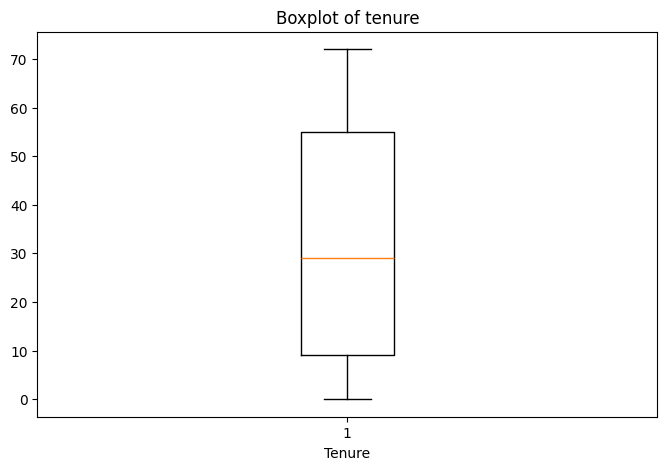

In [15]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['tenure'].dropna())
plt.title('Boxplot of tenure')
plt.xlabel('Tenure')
plt.show()

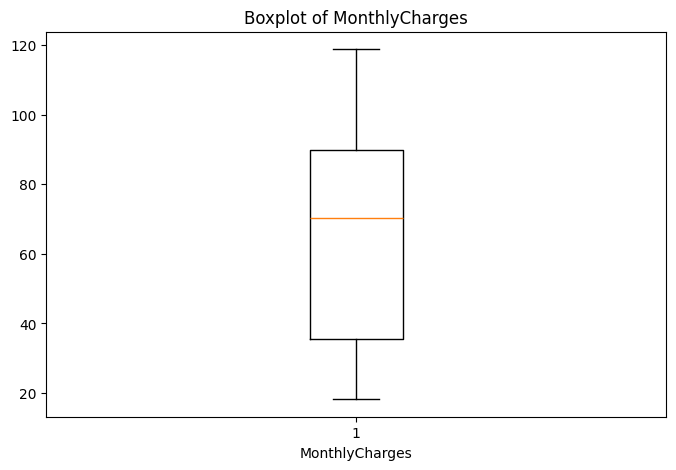

In [16]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['MonthlyCharges'].dropna())
plt.title('Boxplot of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()

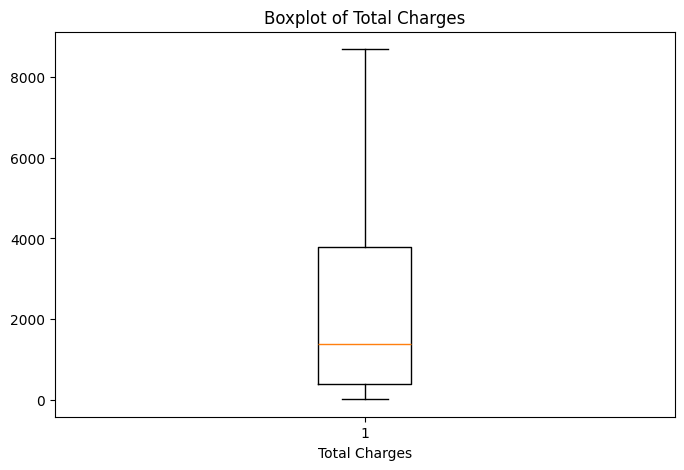

In [17]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['TotalCharges'].dropna())
plt.title('Boxplot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
num_cols = df.select_dtypes(include=['float64', 'int']).columns
num_cols = num_cols.drop('Churn')
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify the scaling by checking the summary statistics
print(df[num_cols].describe())


             gender  SeniorCitizen       Partner    Dependents        tenure  \
count  7.043000e+03   7.043000e+03  7.043000e+03  7.043000e+03  7.043000e+03   
mean  -2.219500e-17  -3.934569e-17  7.162933e-17  1.069396e-16 -6.204512e-17   
std    1.000071e+00   1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -1.009559e+00  -4.394566e-01 -9.666223e-01 -6.540119e-01 -1.318899e+00   
25%   -1.009559e+00  -4.394566e-01 -9.666223e-01 -6.540119e-01 -9.521004e-01   
50%    9.905318e-01  -4.394566e-01 -9.666223e-01 -6.540119e-01 -1.369931e-01   
75%    9.905318e-01  -4.394566e-01  1.034530e+00  1.529024e+00  9.226464e-01   
max    9.905318e-01   2.275537e+00  1.034530e+00  1.529024e+00  1.615488e+00   

       PhoneService  MultipleLines  InternetService_0  InternetService_1  \
count  7.043000e+03   7.043000e+03       7.043000e+03       7.043000e+03   
mean  -1.008864e-16  -5.094762e-17       2.623046e-17      -9.886865e-17   
std    1.000071e+00   1.000071e+00       1.000071e+

Model Building

In [19]:
!pip install scikit-learn

In [20]:
from scipy.integrate import trapezoid

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [24]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 81.90%
Confusion Matrix:
[[931 105]
 [150 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



From this we can conclude that this is a model with a good predictive accuracy of 81.90%.